In [170]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

In [171]:
df = pd.read_excel('./data/shop.xls', header=None)

In [172]:
from dateutil.parser import parse
df['month'] = df[0].apply(lambda x: parse(x, dayfirst=True).month)
df['weekend'] = df[0].apply(lambda x: parse(x, dayfirst=True).weekday() in [5, 6])
df['weekend'] = df['weekend'].apply(lambda w: 1 if w else 0)
df.drop(0, axis=1, inplace=True)

df[1] = df[1].replace(' ', 0).astype('float64')

df[2] = df[2].replace(' ', 0).astype('float64')

df.rename(columns = {
    1: 'sales',
    2: 'discount'
}, inplace=True);

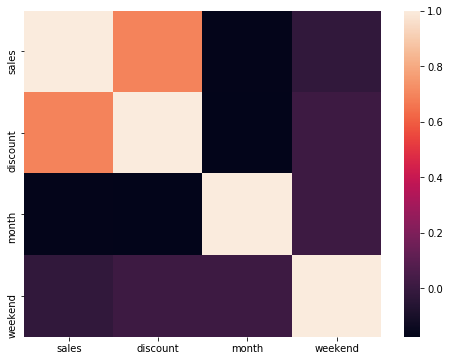

In [173]:
sns.heatmap(df.corr());

In [174]:
length = df.shape[0]
holdout_size = int(length * 0.1)
df_holdout = df[(length - holdout_size):length]
df.drop(np.arange(length - holdout_size, length), inplace=True)

In [175]:
y = df['sales'].values
df.drop(['sales'], axis=1, inplace=True)

In [176]:
X_train, X_cv, y_train, y_cv = train_test_split(df.values, y, test_size=0.3)

In [177]:
from sklearn.pipeline import Pipeline

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 30)}

model = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
trainPredict = model.predict(X_train)
testPredict = model.predict(X_cv)

print("kNN(train) mse =", mean_squared_error(y_train, trainPredict))
print("kNN(test) mse =", mean_squared_error(y_cv, testPredict))
print(model.best_params_)

kNN(train) mse = 5308.746849
kNN(test) mse = 11652.7429785
{'knn__n_neighbors': 3}


In [178]:
tree_params = {'max_depth': range(1,30), 'min_samples_leaf': range(1,30)}

model = GridSearchCV(DecisionTreeRegressor(), tree_params, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
trainPredict = model.predict(X_train)
testPredict = model.predict(X_cv)

print("tree(train) mse =", mean_squared_error(y_train, trainPredict))
print("tree(test) mse =", mean_squared_error(y_cv, testPredict))
print(model.best_params_)

tree(train) mse = 3770.33410457
tree(test) mse = 10781.1572111
{'min_samples_leaf': 1, 'max_depth': 8}


In [179]:
poly = PolynomialFeatures(5)
X_train_poly = poly.fit_transform(X_train)
X_cv_poly = poly.fit_transform(X_cv)

model = LinearRegression()
model.fit(X_train_poly, y_train)
trainPredict = model.predict(X_train_poly)
testPredict = model.predict(X_cv_poly)

print("LinearRegression(train) mse =", mean_squared_error(y_train, trainPredict))
print("LinearRegression(test) mse =", mean_squared_error(y_cv, testPredict))

LinearRegression(train) mse = 3932.05867228
LinearRegression(test) mse = 6561270.8461


In [180]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_cv_norm = scaler.transform(X_cv)

model = MLPRegressor(hidden_layer_sizes=(1000, 1000))
model.fit(X_train_norm, y_train)
trainPredict = model.predict(X_train_norm)
testPredict = model.predict(X_cv_norm)

print("MLPRegressor(train) mse =", mean_squared_error(y_train, trainPredict))
print("MLPRegressor(test) mse =", mean_squared_error(y_cv, testPredict))

MLPRegressor(train) mse = 8283.54657953
MLPRegressor(test) mse = 14867.480651


In [181]:
y_holdout = df_holdout['sales'].values
df_holdout.drop(['sales'], axis=1, inplace=True)

In [182]:
holdoutPredict = model.predict(df_holdout.values)
mean_squared_error(y_holdout, holdoutPredict)

42252206.53310886